In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('hepatitis_csv.csv')
df = df[df.columns[df.isnull().mean() < 0.7]]
df = df.loc[df.isnull().mean(axis = 1) < 0.7]
for x in df.columns:
    replace_value = df[x].value_counts().idxmax()
    df[x] = df[x].fillna(replace_value)
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['class'] = df['class'].apply(lambda x: 1 if x == 'live' else 0)
c = df.corr()
x = df['ascites']
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)

2.0630720035285033 0.07101113683979321
1.3413531003494048


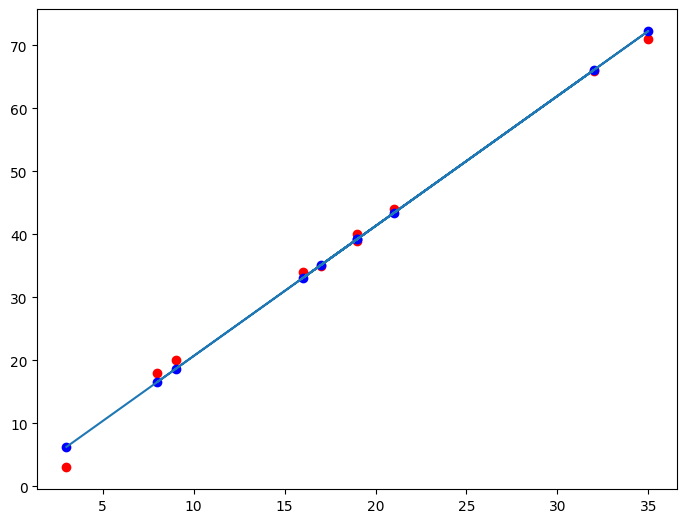

[[-0.02305764]
 [ 2.06716792]]
20.701731172124827 [20.64862155]


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('study.csv')
xb, yb = df['study time'].mean(), df['score'].mean()
a, b = 0, 0
x = df['study time'].to_numpy()
y = df['score'].to_numpy()
n = len(df)
for i in range(n):
    a += (x[i] - xb) * (y[i] - yb)
    b += (x[i] - xb) ** 2
b0 = a / b
b1 = yb - (b0 * xb)
print(f'{b0} {b1}')
err = 0
yn = []
for i in range(n):
    err += (y[i] - ((b0 * x[i]) + b1)) ** 2
    yn.append((b0 * x[i]) + b1)
err /= n
err **= 0.5
print(err)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
yn = np.array(yn)
plt.scatter(x, y, c= 'red')
plt.scatter(x, yn, c= 'blue')
plt.plot(x, yn)
plt.show()
a, b, c, d = 0, 0, 0, 0
for i in range(n):
    a += x[i]
    b += x[i] ** 2
    c += y[i]
    d += y[i] * x[i]
A = np.array([1, a, a, b]).reshape((2, 2))
B = np.array([c, d]).reshape((2, 1))
a = np.linalg.inv(A)
ans = a.dot(B)
print(ans)
y1 = (b0 * 10) + b1
y2 = (ans[1] * 10) + ans[0]
print(f'{y1} {y2}')